<a href="https://colab.research.google.com/github/Pyth-Men-Code/R-gressionModel-AI-Classification/blob/main/Regression_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Table des matieres
- [problem statement](#problem-statement)
- [data-collection](#data-collection)
- [data-cleaning](#data-cleaning)
  - [check missing-values](#check-missing-value)
  - [remouve duplicates](#remouve-duplicates)
- [data-analysis](#data-analysis)
  - [drop-clip outliers](#Drop-Clip-outliers)
- [Preprocessing](#Preprocessing)


## Problem statement
- Dans le cadre d'une étude en science des données, on nous a demandé en tabt que apprentis en data science de créer un système automatisé pour estimer l'assurance médicale annuelle d'un nouveau client en utilisant des informations telles que son âge, son sexe, le fait qu'il soit fumeur ou non.

## data-collection

In [133]:
! pip install plotly matplotlib seaborn --quiet

In [134]:
import pandas as pd
import numpy as np
import matplotlib
#from sklearn.preprocessing import LabelEncoder
#from sklearn.pipeline import make_pipeline
import  matplotlib.pyplot as plt
import seaborn  as sns
import plotly.express as px

In [135]:
df = pd.read_csv('/content/insurance.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [136]:
#from google.colab import drive
#drive.mount('/content/drive')

In [137]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [138]:
df.shape

(1338, 7)

In [139]:
df.describe().apply(lambda s:s.apply(lambda x:format(x,'.2f')))

,age,bmi,children,charges
count,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.66,1.09,13270.42
std,14.05,6.10,1.21,12110.01
min,18.00,15.96,0.00,1121.87
25%,27.00,26.30,0.00,4740.29
50%,39.00,30.40,1.00,9382.03
75%,51.00,34.69,2.00,16639.91
max,64.00,53.13,5.00,63770.43


## data-cleaning
In this step we are going to clean out data, filling missing value, remouving duplicates and outliers

### check missing value

In [140]:
df.isna().sum() / df.shape[0]

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

### remouve duplicates

In [141]:
df.duplicated().sum()

1

In [142]:
df.drop_duplicates(inplace=True)
df.shape

(1337, 7)

## data-analysis
we are going to visualize our data before any cleaning, we will have a look to have better understand before any tranformation

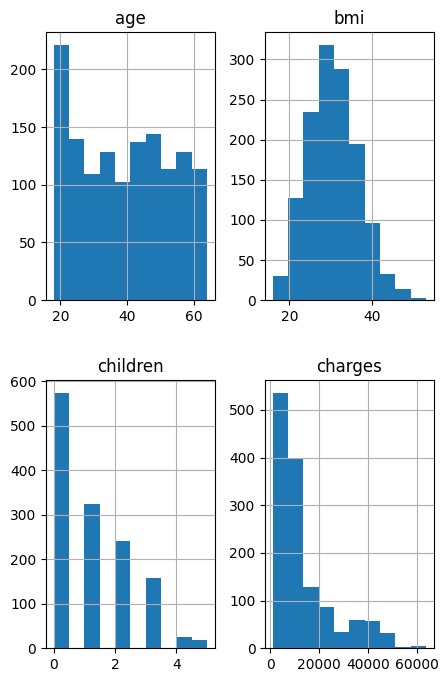

In [143]:
# we create a hist to understand the distribution of numerical variables
df.hist(figsize=(5, 8))
plt.show()

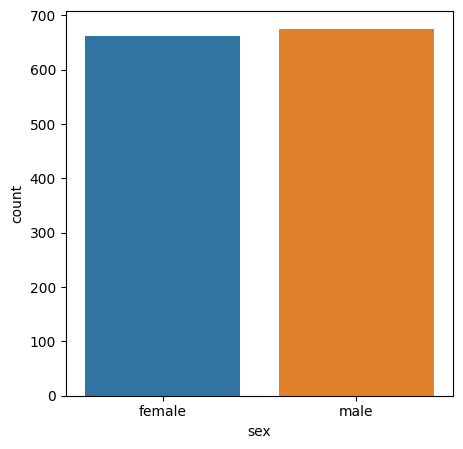

In [144]:
# for the categorical variables we consider the countplot to understand the destribution
fig, ax = plt.subplots(figsize=(5,5))
x=ax
sns.countplot(x='sex', data= df)
plt.show()
## replace x to visualize other categorical features

### outlier detection

In [145]:
fig = px.histogram(df,
                   x='age',
                   marginal='box',
                   nbins=47,
                   width=1000,
                   height=500,
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()


On peut remarquer qu'il n'a pas de outliers pour la features age 50% de la population étudiée ont 39 ans et moins, le min(q1-1.5*iq)= 18 et max(q3+1.5*iq)= 64ans

Etudiant la distribution de la features BMI qu'est l'indice corporelle qui est utilisé determiné le degré de bonne santé de chaque individu

In [146]:
fig = px.histogram(df,
                   x='bmi',
                   marginal='box',
                    width=1000,
                   height=500,
                   color_discrete_sequence=['red'],
                   title='Distribution of BMI (Body Mass Index)')
fig.update_layout(bargap=0.1)
fig.show()

Pourquoi la distribution des âges forme-t-elle une distribution uniforme alors que la distribution des IMC forme une distribution gaussienne ?

Les personnes dont l'IMC se situe entre 20 et 30 sont considérées comme relativement saines et celles dont l'IMC est inférieur ou supérieur à cette fourchette sont considérées comme des catégories à risque pour la santé. Ces personnes sont plus sujettes aux problèmes de santé et les entreprises devront donc payer davantage de factures médicales pour ce type de clients.


Visualisons la distribution des "frais", c'est-à-dire les frais médicaux annuels pour les clients. C'est la colonne que nous essayons de prédire. Utilisons également la colonne catégorielle "fumeur" pour distinguer les frais des fumeurs et des non-fumeurs.

In [147]:
fig = px.histogram(df,
                   x='charges',
                   marginal='box',
                   color='smoker',
                    width=1000,
                   height=500,
                   color_discrete_sequence=['red','blue'],
                   title='Distribution of BMI (Body Mass Index)')
fig.update_layout(bargap=0.1)
fig.show()

Le graphique ci-dessus nous permet de faire les observations suivantes :

Pour la plupart des clients, les frais médicaux annuels sont inférieurs à 10 000 dollars. Seule une petite fraction de clients a des frais médicaux plus élevés, probablement en raison d'accidents, de maladies graves et de maladies génétiques. La distribution suit une "loi de puissance"
Il existe une différence significative dans les frais médicaux entre les fumeurs et les non-fumeurs. Alors que la médiane pour les non-fumeurs est de 7300 $, la mediane (q2) poue les fumeur est de 34456$.

Obervons la charges comment elle varie en fonction de la région  

In [148]:
fig = px.histogram(df,
                   x='charges',
                   marginal='box',
                   width=2000,
                   height=500,
                   title='destribution des charges')
fig.update_layout(bargap=0.1)
fig.show()

Ici on observe la distribution des charges qui est notre target , la variable dépendante qu'on essaie de prédire, 75% des clients paient moins de q3= 16.657k et le max(q3+1.5*iq)= 34.61k pour les autres cas c'est vraiment rare par example pour le max des charges 63770.42 c'est une personnes agée qui fumme et qui a une bmi qui ne se situe pas entre 20 et 30 et qui habite au sudest(les habitants de cette région payent beaucoup plus cher que les autres comme vous pouvez le voir dans le graphe suivant qui explique les charges en fonction des régions), donc comme ces valeurs sont rare et en dehors de notre intervale on peut faire un clip pour les ramener.

In [149]:

max_charge_value = df['charges'].max()
max_charge_rows = df[df['charges'] == max_charge_value]

print(max_charge_rows)


     age     sex    bmi  children smoker     region      charges
543   54  female  47.41         0    yes  southeast  63770.42801


In [150]:
fig = px.histogram(df,
                   x='charges',
                   marginal='box',
                   color='region',
                   width=2000,
                   height=800,
                   title='charges en fonction des regions ')
fig.update_layout(bargap=0.1)
fig.show()

Dans la répartition des frais par sexe, nous constatons que les hommes sont plus lourdement facturés parce que, par un comportement subconscient, les hommes sont explorateurs et sont plus susceptibles de prendre des risques, ce qui les met plus en danger que leurs homologues. Dans la deuxième répartition, nous constatons que le sud-est des États-Unis est en tête pour ce qui est des frais, mais que la majorité des clients de toutes les régions des États-Unis sont facturés entre 0 et 20 000 euros seulement. Ici avant même d'afficher la matrice de correlation on peut voir que la région n'a pas une forte corrélation avec les charge

Observont comment varie les charges en fonction de nombre d'enfant

In [151]:
fig = px.histogram(df,
                   x='charges',
                   marginal='box',
                   color='children',
                   width=2000,
                   height=600,
                   title="charges due aux nobre d'enfant"
                  )
fig.update_layout(bargap=0.1)
fig.show()

la plupart des clients ont 0 ou 1 enfant et la mediane de la charge est entre 8.5 et 11k dollars.
les personnes qui ont plusieurs enfants sont moins prioritaire en terme de remise tarifaire

In [152]:
fig = px.scatter(df,
                   x='charges',
                   y='age',
                   color='smoker',
                   width=1000,
                   height=500,
                   title='age vs charges')
fig.update_layout(bargap=0.1)
fig.show()

La tendance générale semble être que les frais médicaux augmentent avec l'âge, comme on peut s'y attendre. Cependant, il existe des variations importantes à chaque âge, et il est clair que l'âge seul ne peut pas être utilisé pour déterminer avec précision les frais médicaux.
Nous pouvons observer trois cluster.

-Le premier groupe, le plus important, se compose principalement de non-fumeurs supposés en bonne santé, dont les frais médicaux sont relativement faibles par rapport à ceux d'autres personnes

--Le deuxième groupe contient un mélange de fumeurs et de non-fumeurs. Il est possible qu'il s'agisse en fait de deux groupes distincts mais qui se chevauchent : "non-fumeurs avec problèmes médicaux" et "fumeurs sans problèmes médicaux majeurs".

Le dernier groupe se compose exclusivement de fumeurs, vraisemblablement des fumeurs ayant des problèmes médicaux majeurs qui sont peut-être liés au tabagisme ou aggravés par celui-ci.

Réflexion : Quelles autres conclusions pouvons-nous tirer du tableau ci-dessus ?

Même si vous souffrez ou non d'une maladie, les fumeurs ont, dans la majorité des cas des frais médicaux plus élevés que les non-fumeurs, et la différence n'est pas mince : elle se situe entre 5000 et 1000 $.

### Drop-Clip outliers

In [153]:
import pandas as pd

def handle_outliers(dataframe, column, method='clip', lower_percentile=0.05, upper_percentile=0.95, multiplier=1.5):
    """
    Handle outliers in a DataFrame column.

    Parameters:
    - dataframe: DataFrame
    - column: str, the column containing outliers
    - method: str, 'clip' to clip outliers or 'drop' to drop rows with outliers
    - lower_percentile: float, lower percentile for clipping (default: 0.05)
    - upper_percentile: float, upper percentile for clipping (default: 0.95)
    - multiplier: float, multiplier for defining outliers in the drop method (default: 1.5)

    Returns:
    - DataFrame with outliers handled
    """

    # Copy the original DataFrame to avoid modifying the input directly
    df = dataframe.copy()

    if method == 'clip':
        # Clip outliers to the specified range
        lower_bound = df[column].quantile(lower_percentile)
        upper_bound = df[column].quantile(upper_percentile)
        df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

    elif method == 'drop':
        # Calculate quartiles and IQR for dropping outliers
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1

        # Define the lower and upper bounds for outliers
        lower_bound = q1 - multiplier * iqr # min
        upper_bound = q3 + multiplier * iqr # max

        # Drop rows containing outliers
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    else:
        raise ValueError("Invalid method. Use 'clip' or 'drop'.")

    return df


In [154]:
df = handle_outliers(df, 'bmi', method='clip')


In [155]:
fig = px.histogram(df,
                   x='bmi',
                   marginal='box',
                    width=1000,
                   height=500,
                   color_discrete_sequence=['red'],
                   title='Distribution of BMI (Body Mass Index)')
fig.update_layout(bargap=0.1)
fig.show()

ici on remarque qu'on a plus de outliers car on a appliquer la method clip sur l'ensemble de donnée de la colonne 'bmi' techniquement on a ramené toutes les valeurs qui était en dehors de l'intervale [0.05, 0.95] rm : on peut modifier cette intervalle.
on a appliqué la méthode clip car on a pas réellement beaucoup de donnée pour appliquer drop.

In [156]:
df = handle_outliers(df, 'charges', method='clip')


In [157]:
fig = px.histogram(df,
                   x='charges',
                   marginal='box',
                    width=1000,
                   height=500,
                   color_discrete_sequence=['red'],
                   title='')
fig.update_layout(bargap=0.1)
fig.show()

On a pu ramener la plupart des valeurs qui sont supérieur à notre max.

In [164]:
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = df.smoker.map(smoker_values)
df.charges.corr(smoker_numeric)

0.7929523352314883

On voit que la relation entre fumeur et les charges est trés forte, on a une correlation positive ce qui signifie que quna dla valeur de cette variable augmente dans notre cas c'est yes (fumeur) la valeur de la target augmente aussi. La même chose pour la bmi et l'age comme vous pouvez le constater ci-dessus.

<ipython-input-163-15cfad1e7bf6>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



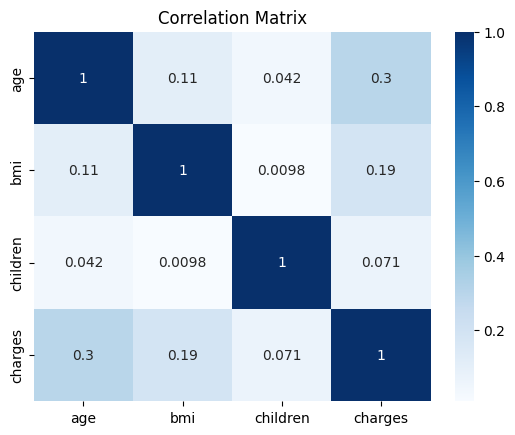

In [163]:
sns.heatmap(df.corr(), cmap='Blues', annot=True)
plt.title('Correlation Matrix');

## Feature engineering

Dans notre cas il n'y a pas de features intéressantes à ajouter, on pourrait en ajouter une pour diviser la bmi en categorie 'underweight', 'normal', 'overweight'

##Preprocessing

In [158]:
data = df.copy()

In [159]:
from sklearn.model_selection import train_test_split

In [160]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1767.49292
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [161]:
target = 'charges'

In [162]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=target, axis=1), data[target], test_size=.2, shuffle=False)

In [166]:
print(f'la taille de x-train est :{X_train.shape}')
print(f'la taille de x-test est :{X_test.shape}')
print(f'la taille de y-train est :{y_train.shape}')
print(f'la taille de y-test est :{y_test.shape}')

la taille de x-train est :(1069, 6)
la taille de x-test est :(268, 6)
la taille de y-train est :(1069,)
la taille de y-test est :(268,)
